# Business Problem - Predict the Price of Bangalore House
Using  Supervised Machine Learning Algorithm

In [573]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [574]:
pwd

'C:\\Users\\hp\\DS CLASS EKEEDA\\machine learning'

In [575]:
df=pd.read_csv('C:\\Users\\hp\\DS CLASS EKEEDA\\machine learning/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [576]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [577]:
df.shape

(13320, 9)

# Exploratory Data Analysis

In [578]:
# get the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [579]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [580]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [581]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [582]:
# find the how much missing data available
df.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<AxesSubplot:>

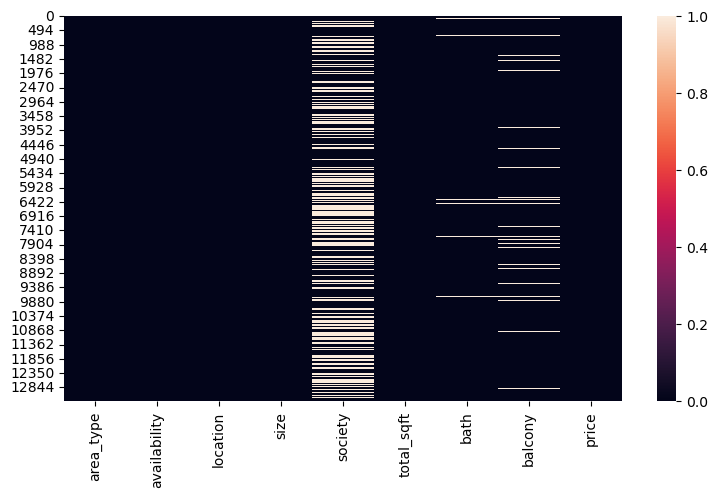

In [583]:
# visualize missing value using heatmap to get idea where is the value missing

plt.figure(figsize=(9,5))
sns.heatmap(df.isnull())

###### Dropping less important features¶


In [584]:
df.isnull().mean()*100 # % of measing value

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [585]:
# Drop ----------> society feature
# because 41T% missing value
df2 = df.drop('society', axis='columns')
df2.shape

(13320, 8)

In [586]:
# fill mean value in --------> balcony feature
# because it contain 4.5% missing value
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [587]:
# drop na value rows from df2
# because there is very less % value missing
df2 = df2.dropna()
df2.shape

(13246, 8)

In [588]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [589]:
df2.shape

(13246, 8)

###### Working on <<<< Size >>>> feature

In [590]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

"""
in  size feature 
a new column named "BHK" is being created, and all units, such as "BHK" and "Bedroom," will be removed or discarded.
Add new column for BHK (Bathrooms Hall Kitchen)
so takes only number and remove sufix text
"""

In [591]:
df2['BHK']= df2['size'].apply(lambda x : int(x.split(' ')[0]) )

In [592]:
df2.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,1


In [593]:
df2['BHK'].unique()


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

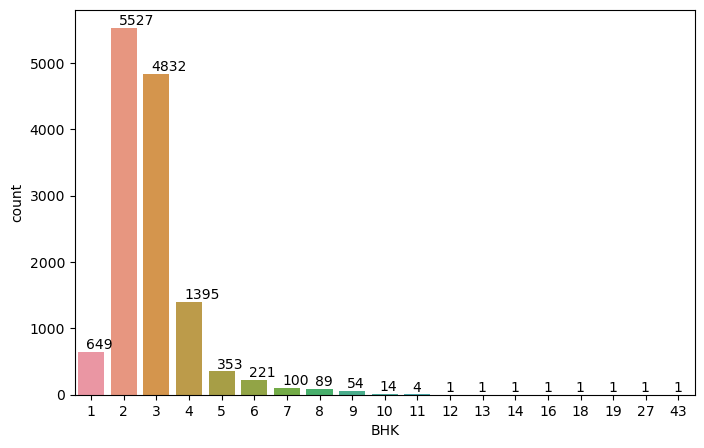

In [594]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x= 'BHK', data= df2)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color='black')


###### Converting 'total_sqft' cat feature in numeric


In [595]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

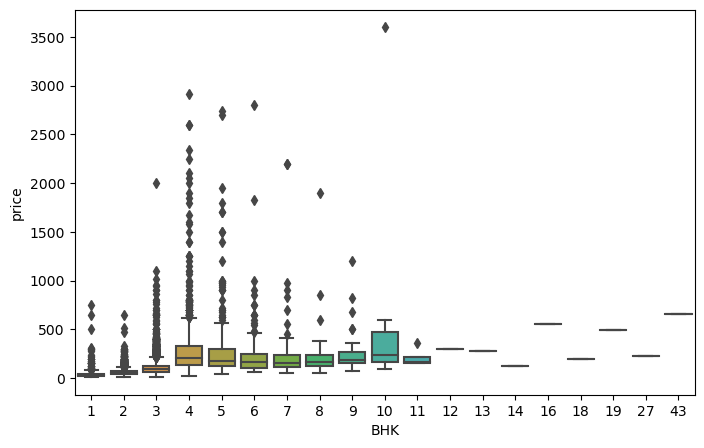

In [596]:
plt.figure(figsize=(8,5))
sns.boxplot(x= 'BHK', y='price', data= df2);

In [597]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [598]:
df2[~df2['total_sqft'].apply(isfloat)]


,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [599]:
# here we observe that 'total_sqft' contain string value in diff format
#float, int like value 1689.28,817 
# range value: 540 - 740 
# number and string: 142.84Sq. Meter, 117Sq. Yards, 1Grounds
# best strategy is to convert it into number by spliting it

In [600]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        None

In [601]:
df2 = df2.copy()
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)
df2

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.000000,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.000000,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.000000,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.000000,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.000000,51.00,2
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.000000,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600.0,5.0,1.584376,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.000000,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689.0,4.0,1.000000,488.00,4


In [602]:
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [603]:
df2.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.000000,231.0,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600.0,5.0,1.584376,400.0,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.000000,60.0,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689.0,4.0,1.000000,488.0,4
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550.0,1.0,1.000000,17.0,1


In [604]:
df2.isnull().sum()

area_type        0
availability     0
location         0
size             0
total_sqft      46
bath             0
balcony          0
price            0
BHK              0
dtype: int64

In [605]:
# drop na value
df2 = df2.dropna()
df2.shape

(13200, 9)

In [606]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13200 non-null  object 
 1   availability  13200 non-null  object 
 2   location      13200 non-null  object 
 3   size          13200 non-null  object 
 4   total_sqft    13200 non-null  float64
 5   bath          13200 non-null  float64
 6   balcony       13200 non-null  float64
 7   price         13200 non-null  float64
 8   BHK           13200 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 1.0+ MB


###### finding outliers  using BHK feature

In [607]:
# here we consider  1 BHK requierd min 350 sqft are
df2[df2['total_sqft']/df2['BHK'] < 350].head()

# no we found outliers 

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020.0,6.0,1.584376,370.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660.0,1.0,1.000000,23.1,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025.0,2.0,1.000000,47.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600.0,9.0,1.584376,200.0,8
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,1.000000,150.0,6


In [608]:
# if 1 BHK total_sqft are < 350 then we ae going to remove them
df2 = df2[~(df2['total_sqft']/df2['BHK'] < 350)]
df2.shape

(12106, 9)

###### create new feature that is price per squre foot 

In [609]:
# create new feature that is price per squre foot 
# it help to find the outliers
#price in lakh so conver into rupee and then / by total_sqft_int

In [610]:
df2 = df2.copy()
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']

In [611]:
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [612]:
df2.price_per_sqft.describe()

#here we can see huge difference between min and max price_per_sqft
# min 6308.502826 and  max 176470.588235 vALUES


count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [613]:
# Removing outliers using help of 'price per sqrt'  taking std and mean per location

In [614]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out

df2 = remove_pps_outliers(df2)
df2.shape

(8888, 10)

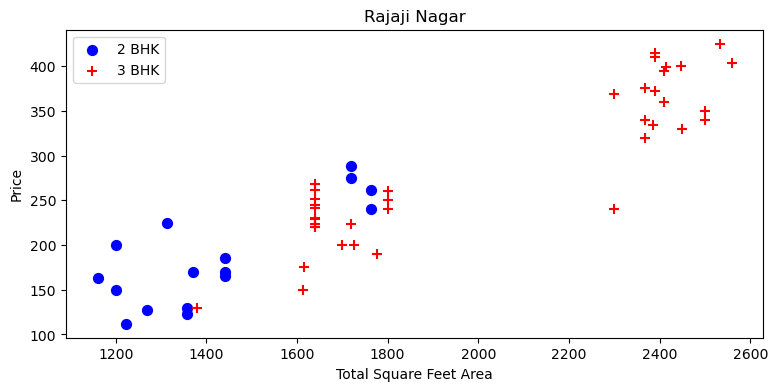

In [615]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.BHK==2)]
  bhk3 = df[(df.location==location) & (df.BHK==3)]
  plt.figure(figsize=(9,4))
  plt.scatter(bhk2.total_sqft, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df2, "Rajaji Nagar")


###### in ABOVE scatterplot we observe that at same location price of 2 bhk house is greater than 3 bhk so it is outlier

In [616]:
# Removing BHK outliers
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('BHK'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('BHK'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

df2 = remove_bhk_outliers(df2)
df2.shape

(7194, 10)

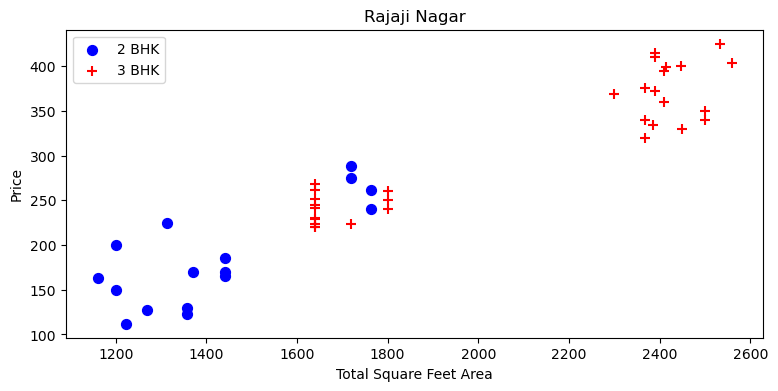

In [617]:
plot_scatter_chart(df2, "Rajaji Nagar")

###### Remove outliers using the help of 'bath' feature

In [618]:
df2.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6.,  7., 12.])

In [619]:
df2[df2.bath > df2.BHK+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
1861,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,7.0,2.000000,80.0,4,3252.032520
5836,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000.0,8.0,1.584376,450.0,4,6428.571429
7098,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338.0,9.0,1.000000,1000.0,6,8819.897689
7569,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,2.000000,116.0,3,6423.034330


In [620]:
# here we are considering data only total no. bathroom =  bhk + 1
df2[df2.bath < df2.BHK+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672.0,3.0,2.0,150.00,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750.0,3.0,3.0,149.00,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750.0,3.0,2.0,150.00,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.00,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.00,2,6916.666667
...,...,...,...,...,...,...,...,...,...,...
8883,Super built-up Area,Ready To Move,frazertown,3 BHK,2900.0,3.0,2.0,325.00,3,11206.896552
8884,Super built-up Area,18-Nov,manyata park,3 BHK,1780.0,3.0,1.0,84.83,3,4765.730337
8885,Plot Area,Ready To Move,tc.palya,2 Bedroom,880.0,2.0,1.0,48.00,2,5454.545455
8886,Plot Area,18-Apr,tc.palya,2 Bedroom,1000.0,2.0,1.0,55.00,2,5500.000000


In [621]:
df2.shape

(7194, 10)

#### Categorical Variable Encoding

##### categorical features - area type, availability, size, society, location and total_srft

In [629]:
df3 = df2.drop(["size"], axis =1)
df3.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,1672.0,3.0,2.0,150.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,1750.0,3.0,3.0,149.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,1750.0,3.0,2.0,150.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667


In [630]:
df4 = pd.get_dummies(df3, drop_first=True, columns=['area_type','availability','location'])
df4.shape

(7194, 821)

In [631]:
df4.head()

,total_sqft,bath,balcony,price,BHK,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,...,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_Yeshwanthpur Industrial Suburb,location_frazertown,location_manyata park,location_tc.palya
0,1672.0,3.0,2.0,150.0,3,8971.291866,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,3.0,149.0,3,8514.285714,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,2.0,150.0,3,8571.428571,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,2.0,40.0,2,3200.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,2.0,83.0,2,6916.666667,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


###### In ['area_type','availability','location'] contain multiple classe and if we convert them into one hot encoding is( a representation of categorical variables as binary vectors) so it increase the size of Date Frame so try to use those classes which are frequently present in the car var

###### Working on  area_type  feature

In [632]:
df3['area_type'].value_counts()

Super built-up  Area    5398
Built-up  Area          1309
Plot  Area               451
Carpet  Area              36
Name: area_type, dtype: int64

In [633]:
# appy Ohe-Hot  encoding on 'area_type' feature
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
  df3["area_type"+cat_var] = np.where(df3['area_type']==cat_var, 1,0)
df3.shape

(7194, 12)

In [635]:
df3.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,1672.0,3.0,2.0,150.0,3,8971.291866,1,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,1750.0,3.0,3.0,149.0,3,8514.285714,0,1,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,1750.0,3.0,2.0,150.0,3,8571.428571,1,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000,1,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667,0,0,1


###### Working with  availability Feature

In [636]:
df3["availability"].value_counts()

Ready To Move    5701
18-Dec            160
18-May            157
18-Apr            155
18-Aug            118
                 ... 
15-Jun              1
16-Sep              1
20-Apr              1
17-Jan              1
16-Jul              1
Name: availability, Length: 71, dtype: int64

In [638]:
# in availability feature, 10525 house 'Ready to Move" and remaining will be redy on perticuler date
# so we crate new feature ""availability_Ready To Move"" and add vale 1 if availability is Ready To Move else 0
df3["availability_Ready To Move"] = np.where(df3["availability"]=="Ready To Move",1,0)
df3.shape

(7194, 13)

In [639]:
df3.tail()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
8883,Super built-up Area,Ready To Move,frazertown,2900.0,3.0,2.0,325.00,3,11206.896552,1,0,0,1
8884,Super built-up Area,18-Nov,manyata park,1780.0,3.0,1.0,84.83,3,4765.730337,1,0,0,0
8885,Plot Area,Ready To Move,tc.palya,880.0,2.0,1.0,48.00,2,5454.545455,0,0,1,1
8886,Plot Area,18-Apr,tc.palya,1000.0,2.0,1.0,55.00,2,5500.000000,0,0,1,0
8887,Plot Area,18-Apr,tc.palya,1400.0,2.0,1.0,78.00,3,5571.428571,0,0,1,0


###### Working on  Location  feature

In [646]:
df3['location'].value_counts()

Whitefield               237
Sarjapur  Road           188
Electronic City          158
Haralur Road             116
Raja Rajeshwari Nagar    116
                        ... 
Chikkakannalli             1
Rajankunte                 1
Rajarajeshwari Nagara      1
Rajarajeshwari nagar       1
Kashi Nagar                1
Name: location, Length: 743, dtype: int64

In [ ]:
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)

In [650]:
df3['location'].value_counts()[df3['location'].value_counts()>=20].index

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Haralur Road',
       'Raja Rajeshwari Nagar', 'Marathahalli', 'Bannerghatta Road',
       'Hennur Road', 'Uttarahalli', 'Thanisandra', 'Hebbal',
       'Electronic City Phase II', 'Yelahanka', '7th Phase JP Nagar',
       'Kanakpura Road', 'KR Puram', 'Sarjapur', 'Rajaji Nagar',
       'Kasavanhalli', 'Bellandur', 'Begur Road', 'Kothanur', 'Banashankari',
       'Hormavu', 'Harlur', 'Jakkur', 'Akshaya Nagar',
       'Electronics City Phase 1', 'Varthur', 'Koramangala', 'Hulimavu',
       'HSR Layout', 'Kaggadasapura', 'Chandapura', 'Hennur',
       'Ramamurthy Nagar', 'Kundalahalli', 'Ramagondanahalli', 'Hoodi',
       'Budigere', 'Malleshwaram', 'Old Madras Road', 'Yeshwanthpur',
       'JP Nagar', 'Hegde Nagar', '8th Phase JP Nagar', 'Thigalarapalya',
       'Gottigere', 'Bisuvanahalli', 'Channasandra', 'Vittasandra',
       'Indira Nagar', 'Sahakara Nagar', 'Brookefield', 'Kengeri',
       'Vijayanagar', 'Hosa Road', 'Old A

In [643]:
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)
for cat_var in location_gert_20:
  df3['location_'+cat_var]=np.where(df3['location']==cat_var, 1,0)
df3.shape

(7194, 161)

In [645]:
df3.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft,area_typeSuper built-up Area,...,location_Domlur,location_Thubarahalli,location_Hoskote,location_Ulsoor,location_Basaveshwara Nagar,location_HBR Layout,location_Poorna Pragna Layout,location_Sanjay nagar,location_Binny Pete,location_Yelachenahalli
0,Super built-up Area,Ready To Move,Devarabeesana Halli,1672.0,3.0,2.0,150.0,3,8971.291866,1,...,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,1750.0,3.0,3.0,149.0,3,8514.285714,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,1750.0,3.0,2.0,150.0,3,8571.428571,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000,1,...,0,0,0,0,0,0,0,0,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667,0,...,0,0,0,0,0,0,0,0,0,0


###### Drop categorical variable

In [651]:
df5 = df3.drop(["area_type","availability",'location'], axis =1)
df5.shape

(7194, 158)

In [652]:
df5.head()

,total_sqft,bath,balcony,price,BHK,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Domlur,location_Thubarahalli,location_Hoskote,location_Ulsoor,location_Basaveshwara Nagar,location_HBR Layout,location_Poorna Pragna Layout,location_Sanjay nagar,location_Binny Pete,location_Yelachenahalli
0,1672.0,3.0,2.0,150.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,3.0,149.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,2.0,150.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,2.0,40.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,2.0,83.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


### Split Dataset in train and test

In [654]:
X = df5.drop("price", axis=1)
y = df5['price']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (7194, 157)
Shape of y =  (7194,)


In [655]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5755, 157)
Shape of y_train =  (5755,)
Shape of X_test =  (1439, 157)
Shape of y_test =  (1439,)


#### Feature Scaling

In [656]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

### Machine Learning Model Training


#### Linear Regression


In [669]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [670]:
lr.coef_

array([ 8.54200974e+01,  2.49247277e+00, -4.29926999e-01, -1.39086831e+01,
        6.75787732e+01, -4.57546408e-02, -2.17982205e+00, -4.50453967e+00,
       -2.06760870e+00, -4.07475164e+00, -2.80953434e+00,  6.57897045e-01,
       -2.61361144e-01, -1.89818108e+00, -9.63004303e-01,  2.50470986e+00,
       -3.25592534e+00, -1.17893342e+00,  2.09139774e+00, -4.86280462e-01,
       -1.77898173e+00, -1.78884468e+00,  1.55543768e-01,  2.60692276e+00,
       -5.55861914e+00,  3.23934435e+00, -6.66591477e-01, -8.47316512e-01,
        1.33820044e+00,  4.10807617e-01, -7.61620496e-01,  1.73428225e+00,
        1.73479008e+00, -1.63510689e+00, -9.96982543e-01, -6.26028827e-01,
        6.78076299e-01,  1.30241978e+00,  4.51918785e-01, -3.84240065e+00,
       -1.91805146e-01,  7.94110353e-01, -1.25454698e+00, -1.54386700e+00,
       -9.75486849e-01, -5.13279156e-01,  1.12415639e+00, -6.79762582e-01,
        1.63746747e-01, -2.34846965e+00,  1.53106328e-01,  4.46773569e-01,
       -2.30023658e+00,  

In [671]:
lr.intercept_

98.37995916594262

#### Predict the value of Home and Test

In [672]:
lr.predict([X_test[0, :]])

array([77.3276433])

In [673]:
y_test

2598     65.00
1812     51.83
1857    136.00
2444     64.80
4968     55.00
         ...  
2808    132.00
2271     50.00
6172     88.20
321      52.36
5852     58.56
Name: price, Length: 1439, dtype: float64

In [674]:
lr.score(X_test, y_test)

0.8424774184284528

### Implementing Ridge and Lasso Regression

In [675]:
from sklearn.linear_model import Ridge, Lasso

In [676]:
rd = Ridge()

rd.fit(X_train,y_train)

rd.score(X_test, y_test)

0.8424752256313096

In [677]:
ls = Lasso()

ls.fit(X_train,y_train)

ls.score(X_test, y_test)

0.8330526040635715

#### Support Vector Machine

In [661]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) 
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.2664004753725504, 100.13893871118027)

#### Random Forest Regressor


In [663]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) 
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.9749781411758389, 18.494101996049668)